### モジュールのインポート

In [1]:
import numpy as np
import pickle
import MeCab
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### サンプルデータの読み込み

In [2]:
with open('Sample_Data.pickle','rb') as f:
    labels,texts = pickle.load(f)

### 形態素解析の辞書，word2vecモデルの読み込み

In [3]:
#辞書
dic_path="dic/mecab-ipadic-neologd-0.0.5"
tagger = MeCab.Tagger("-Ochasen -d {0}".format(dic_path))
# word2vecのモデル
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('word2vec/entity_vector.model.txt')

### CNNによるテキスト分類

In [4]:
import CNN_text
CNN_classifier = CNN_text.CNN(tagger=tagger,model=model,filter_sizes=[3,4,5],n_epochs=100)

Using TensorFlow backend.


In [5]:
CNN_classifier.fit(labels=labels,texts=texts)

学習開始
EPOCH:1
 epoch 20, loss 2.76675, acc 0.293
EPOCH:2
 epoch 40, loss 2.84226, acc 0.3415
EPOCH:3
 epoch 60, loss 2.73304, acc 0.3605
EPOCH:4
 epoch 80, loss 2.47861, acc 0.363
EPOCH:5
 epoch 100, loss 2.33891, acc 0.3675
EPOCH:6
 epoch 120, loss 2.10355, acc 0.3535
EPOCH:7
 epoch 140, loss 1.97631, acc 0.3675
EPOCH:8
 epoch 160, loss 1.91082, acc 0.3765
EPOCH:9
 epoch 180, loss 1.90338, acc 0.353
EPOCH:10


KeyboardInterrupt: 

### 正解率とConfusionMatrix

正解率：0.3765000104904175


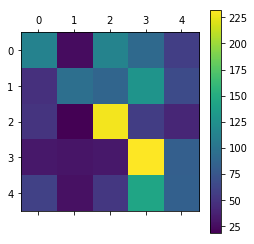

In [6]:
Results = CNN_classifier.Results

print('正解率：{}'.format(max(Results['Accuracy'].values)))
CMX = pd.DataFrame(Results.loc[Results['Accuracy'].argmax(),'confusion_matrix'])
plt.matshow(CMX)
plt.colorbar()

### 最も loss が小さかったモデルの復元

In [7]:
import tensorflow as tf
saver = tf.train.Saver()
Best_sess = tf.InteractiveSession()
saver.restore(Best_sess, "model/Best_model.ckpt")

INFO:tensorflow:Restoring parameters from model/Best_model.ckpt
